# CUSTOMER SEGMENTATION RESEARCH PROJECT
#### 1-General Information of the Data
#### 2-Checking for Null Values
#### 3-Overview About Outliers
#### 4-Exploratory Data Analaysis
#### 5-Clustering Methods
#### 6-Comparing Results for the Optimal Number of Cluster Model


### 1- General Information Of Data

Features
- Fresh: annual spending (m.u.) on fresh products (Continuous);
- Milk: annual spending (m.u.) on milk products (Continuous);
- Grocery: annual spending (m.u.) on grocery products (Continuous);
- Frozen: annual spending (m.u.) on frozen products (Continuous);
- Detergents_Paper: annual spending (m.u.) on detergents and paper products (Continuous);
- Delicassen: annual spending (m.u.) on and delicatessen products (Continuous);
- Channel: {Hotel/Restaurant/Cafe - 1, Retail - 2} (Nominal)
- Region: {Jakarta - 1, Surabaya - 2, or Other - 3} (Nominal)

Importing useful libraries.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from scipy.stats import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest

import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import time

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


from sklearn.cluster import DBSCAN

from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA


Mounted at /content/drive


General view of first five row the data.

In [ ]:
df= pd.read_csv("../content/customers.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
Channel,2,2,2,1,2,2,2,2,1,2,...,1,1,1,1,1,1,1,2,1,1
Region,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Fresh,12669,7057,6353,13265,22615,9413,12126,7579,5963,6006,...,3097,8533,21117,1982,16731,29703,39228,14531,10290,2787
Milk,9656,9810,8808,1196,5410,8259,3199,4956,3648,11093,...,4230,5506,1162,3218,3922,12051,1431,15488,1981,1698
Grocery,7561,9568,7684,4221,7198,5126,6975,9426,6192,18881,...,16483,5160,4754,1493,7994,16027,764,30243,2232,2510
Frozen,214,1762,2405,6404,3915,666,480,1669,425,1159,...,575,13486,269,1541,688,13135,4510,437,1038,65
Detergents_Paper,2674,3293,3516,507,1777,1795,3140,3321,1716,7425,...,241,1377,1328,356,2371,182,93,14841,168,477
Delicassen,1338,1776,7844,1788,5185,1451,545,2566,750,2098,...,2080,1498,395,1449,838,2204,2346,1867,2125,52


General ınformation.

In [ ]:
df.info() #There is 440 rows and 8 columns on data. However 'Channel' and 'Region' columns must be nominal.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df["Channel"] = df["Channel"].replace({1: "HRC", 2: "Retail"})
df["Region"] = df["Region"].replace({1: "Jakarta", 2: "Surabaya", 3: "Other"})

In [ ]:
df.head() #Looks nice!

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,HRC,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


### 2-Checking For Null Values

In [ ]:
df.isnull().sum()*100/df.shape[0] #No null value appears.

,0
Channel,0.0
Region,0.0
Fresh,0.0
Milk,0.0
Grocery,0.0
Frozen,0.0
Detergents_Paper,0.0
Delicassen,0.0


In [ ]:
columns = df.columns
for i, col in enumerate (columns):
    print (f"Columns {i} = ", df[col].nunique())

Columns 0 =  2
Columns 1 =  3
Columns 2 =  433
Columns 3 =  421
Columns 4 =  430
Columns 5 =  426
Columns 6 =  417
Columns 7 =  403


In [ ]:
for i in columns:
    if (df[i].nunique() < 10):
        print ("Feature:\t", i, "\n", df[i].unique(), "\n#########################\n")

Feature:	 Channel 
 ['Retail' 'HRC'] 
#########################

Feature:	 Region 
 ['Other' 'Jakarta' 'Surabaya'] 
#########################



### 3-Overview About Outliers

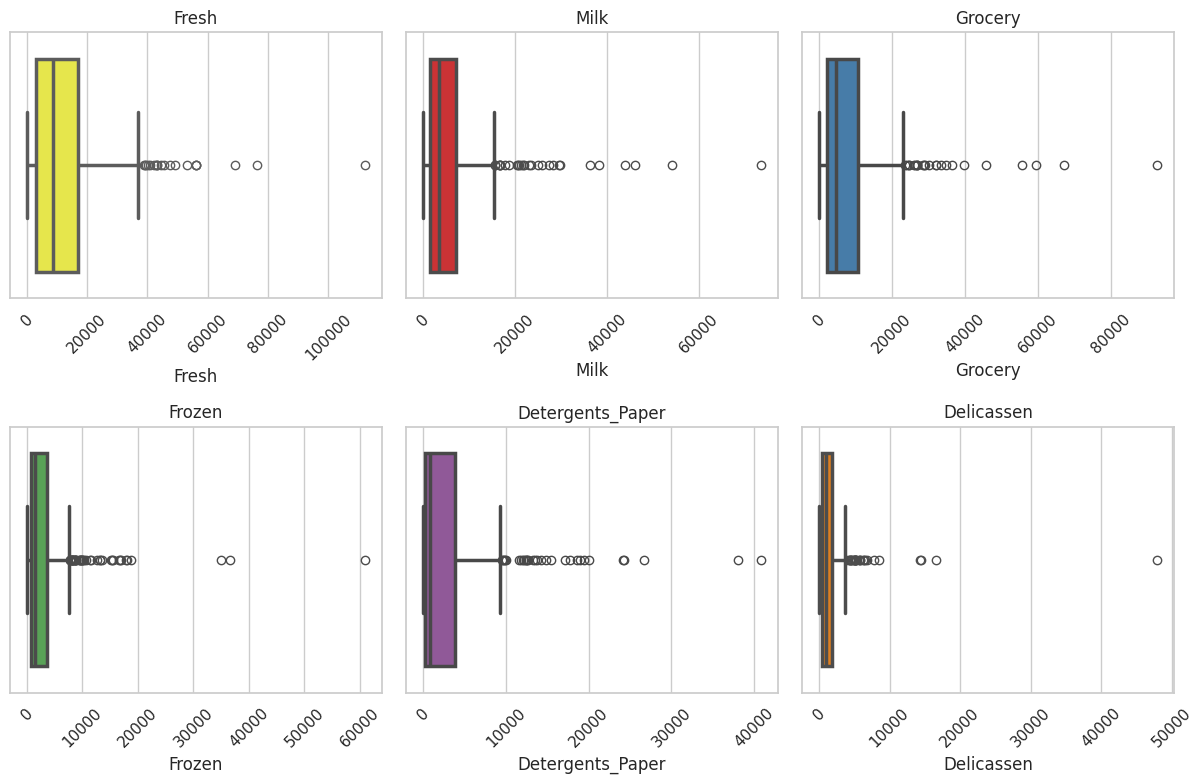

In [ ]:
plt.figure(figsize=(12,8))
col_names = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
color_palette = sns.color_palette("Set1", len(col_names))

for i in range(6):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col_names[i]], color=color_palette[i - 1], linewidth=2.5)
    plt.title(col_names[i])
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Review outliers with histogram.

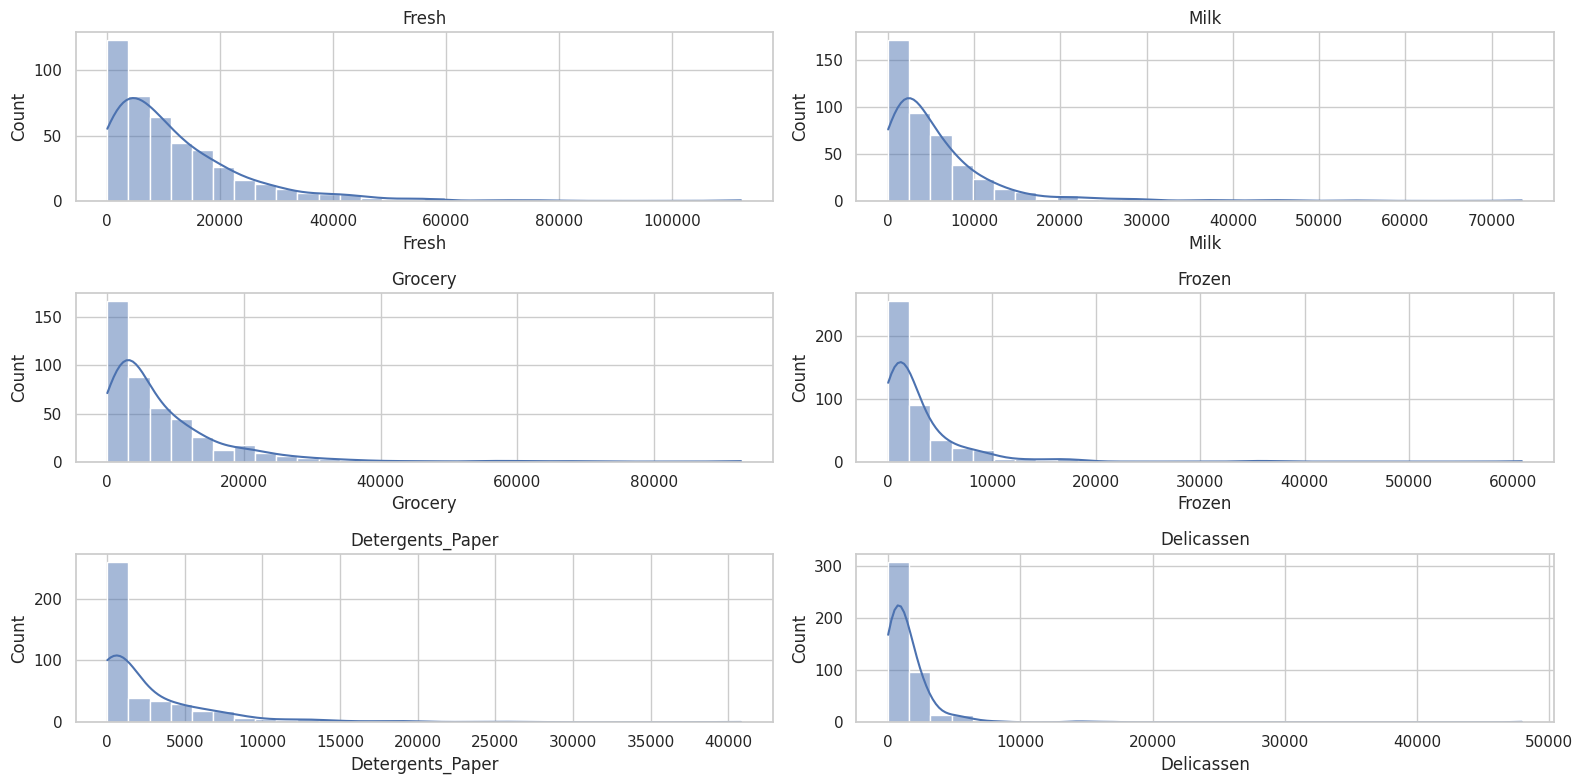

In [ ]:
plt.figure(figsize=(16,8))
for i in range(6):
    plt.subplot(3,2,i+1)
    sns.histplot(df[col_names[i]], bins=30, kde=True)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()


### 4-Exploratory Data Analaysis

Some statistical significance about the data.

In [ ]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


In [ ]:
col_names = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
df_log = df.copy()

for col in col_names:
    df_log[col] = np.log(df_log[col] + 1)

df_log.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.732813,8.121615,8.442205,7.303128,6.791781,6.671094
std,1.470618,1.080635,1.111523,1.281888,1.709519,1.293960
min,1.386294,4.025352,1.386294,3.258097,1.386294,1.386294
25%,8.048378,7.335633,7.675081,6.611024,5.551989,6.014321
50%,9.048404,8.196435,8.467267,7.331043,6.706242,6.873680
75%,9.737123,8.880619,9.273948,8.176177,8.274596,7.507278
max,11.627610,11.205027,11.437997,11.016496,10.617123,10.777789


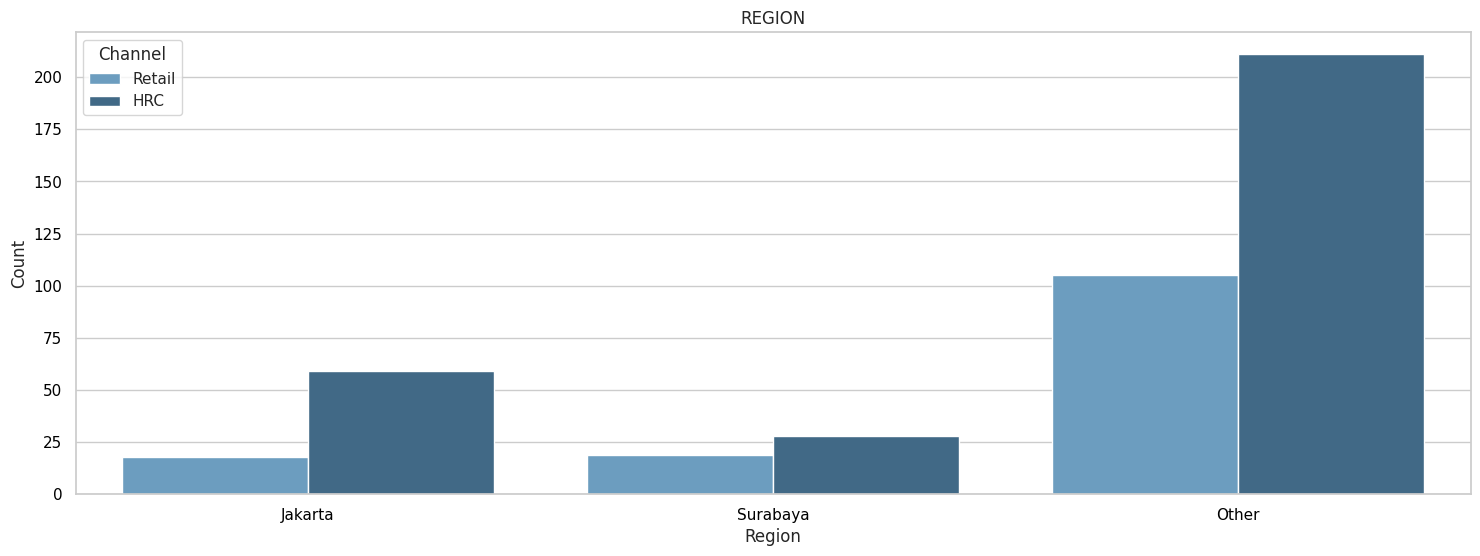

In [ ]:
plt.figure(figsize=(18,6))

# Pastikan Region dalam format kategori
df["Region"] = pd.Categorical(df["Region"], categories=["Jakarta", "Surabaya", "Other"], ordered=True)

sns.countplot(data=df, x="Region", hue="Channel", palette="Blues_d")

plt.title("REGION")
plt.xlabel("Region")
plt.ylabel("Count")
plt.tick_params(colors="black")
plt.show()

#### Examination of the correlation between continuous features.

In [ ]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
df_numeric = df_log.select_dtypes(include=np.number)
print(df_numeric.corr())

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
Fresh             1.000000 -0.021096 -0.132989  0.386258         -0.158706    0.256442
Milk             -0.021096  1.000000  0.761128 -0.055229          0.678725    0.342310
Grocery          -0.132989  0.761128  1.000000 -0.164525          0.797141    0.239998
Frozen            0.386258 -0.055229 -0.164525  1.000000         -0.212771    0.256318
Detergents_Paper -0.158706  0.678725  0.797141 -0.212771          1.000000    0.167573
Delicassen        0.256442  0.342310  0.239998  0.256318          0.167573    1.000000


Correlation Matrix

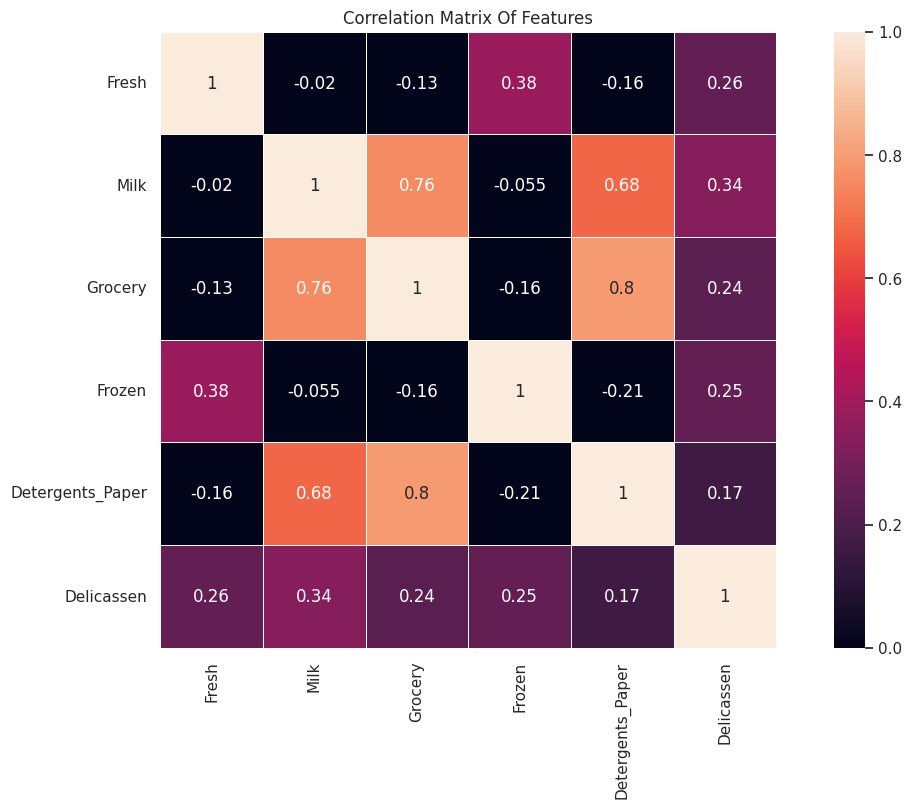

In [ ]:
correlation_matrix = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, square=True, annot=True, vmin=0, vmax=1, linewidth=0.5)
plt.title("Correlation Matrix Of Features")
plt.show()

#### Feature Engineering

In [ ]:
df = pd.concat([df, pd.get_dummies(df["Channel"], drop_first=True),
                    pd.get_dummies(df["Region"], drop_first=True)], axis=1)

df.drop(columns=["Channel", "Region"], inplace=True)

df.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Retail,Surabaya,Other
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,True,False,True
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,True,False,True
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,True,False,True
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,False,False,True
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,True,False,True


### 5-Clustering Methods

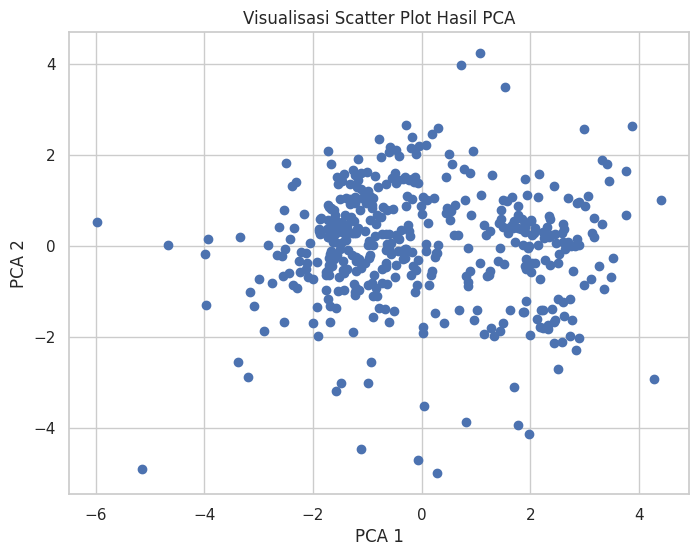

In [ ]:
# Scale the data
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# Apply PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_std)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


# Visualize the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Scatter Plot Hasil PCA')
plt.show()

#### 5.1- K-Means

In [ ]:
pca_data = principalComponents

# Inisialisasi list untuk menyimpan hasil evaluasi
wcss = []  # Untuk Elbow Method
scores = []  # Untuk Silhouette Score

# Mencari jumlah cluster optimal
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(pca_data)

    # Simpan nilai WCSS (Within-Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)

    # Hitung silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(pca_data, labels)
    scores.append(silhouette_avg)

    print(f'WCSS score for n_clusters={i}: {wcss[-1]}')
    print(f'Silhouette score for n_clusters={i}: {silhouette_avg}')

# Menentukan jumlah cluster terbaik berdasarkan Silhouette Score
best_n_silhouette = range(2, 10)[np.argmax(scores)]

# Menentukan jumlah cluster terbaik berdasarkan Elbow Method (WCSS) - titik dengan perubahan drastis
diff_wcss = np.diff(wcss)  # Selisih antar nilai WCSS
best_n_elbow = range(3, 10)[np.argmin(diff_wcss) + 1]  # Cari perubahan terbesar


print("\n##########################\n")
print(f"Best number of clusters based on Silhouette Score: {best_n_silhouette}")
print(f"Best number of clusters based on Elbow Method: {best_n_elbow}")


WCSS score for n_clusters=2: 1081.8761794493523
Silhouette score for n_clusters=2: 0.4830459277285057
WCSS score for n_clusters=3: 797.8095371664893
Silhouette score for n_clusters=3: 0.37299566823032676
WCSS score for n_clusters=4: 621.0548040502193
Silhouette score for n_clusters=4: 0.3650316385165191
WCSS score for n_clusters=5: 519.4088016682613
Silhouette score for n_clusters=5: 0.3639696877953495
WCSS score for n_clusters=6: 443.52633826750116
Silhouette score for n_clusters=6: 0.37139446422147376
WCSS score for n_clusters=7: 379.11663176177103
Silhouette score for n_clusters=7: 0.3773000538155479
WCSS score for n_clusters=8: 337.1059223491589
Silhouette score for n_clusters=8: 0.3781659521692432
WCSS score for n_clusters=9: 306.4264730074639
Silhouette score for n_clusters=9: 0.3494093557229303

##########################

Best number of clusters based on Silhouette Score: 2
Best number of clusters based on Elbow Method: 4


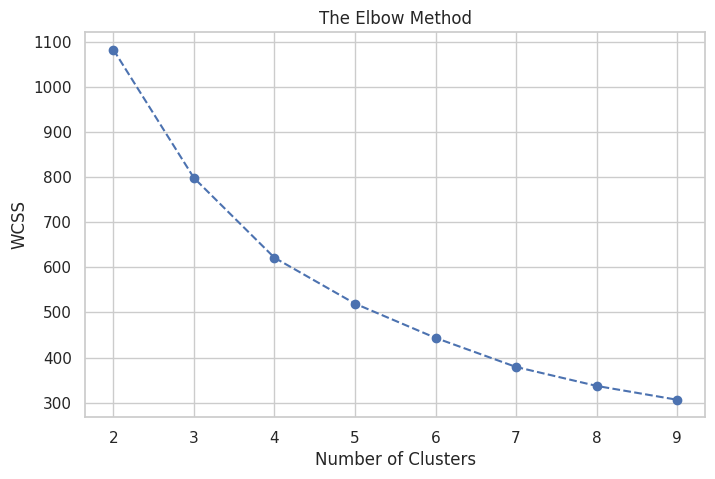

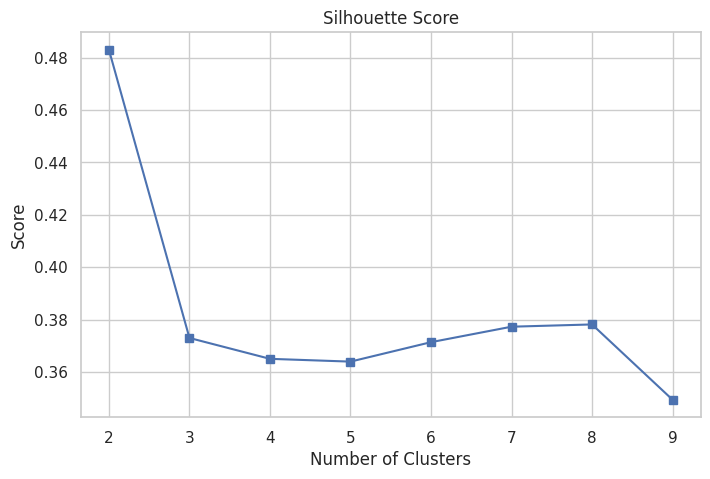

In [ ]:
# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Visualisasi Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), scores, marker='s', linestyle='-')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

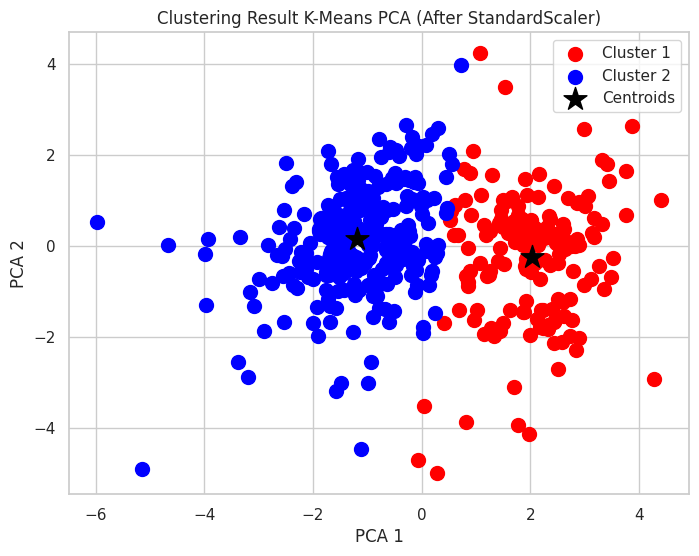

In [ ]:
# Model Clustering dengan jumlah cluster optimal dari Silhouette Score
kmeans_model = KMeans(n_clusters=best_n_silhouette, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans_model.fit_predict(pca_data)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[y_kmeans == 0, 0], pca_data[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(pca_data[y_kmeans == 1, 0], pca_data[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')


# Menampilkan centroid cluster
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=300, c='black', label='Centroids', marker='*')
plt.title('Clustering Result K-Means PCA (After StandardScaler)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Hitung Davies-Bouldin Index untuk jumlah cluster optimal (misal 3)
dbi_score = davies_bouldin_score(pca_data, y_kmeans)

print("Davies-Bouldin Index:", dbi_score)


Davies-Bouldin Index: 0.8173024734561787


#### 5.2- Hierarchy Clustering

In [ ]:
# List metode linkage
linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]

# Evaluasi Silhouette Score untuk berbagai metode linkage
for j in range(len(linkage_col)):
    print(f'Linkage: {linkage_col[j]}')
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage=linkage_col[j])
        labels = AC.fit_predict(pca_data)
        silhouette_avg = silhouette_score(pca_data, labels)
        scores.append(silhouette_avg)
        print(f'Silhouette Score for n_clusters = {i}: {silhouette_avg}')
    print("\n##########################\n")
    scores_all[j] = scores


Linkage: ward
Silhouette Score for n_clusters = 2: 0.4840202083006399
Silhouette Score for n_clusters = 3: 0.3508909775034634
Silhouette Score for n_clusters = 4: 0.3365435918858113
Silhouette Score for n_clusters = 5: 0.3436623973052718
Silhouette Score for n_clusters = 6: 0.3268672086411089
Silhouette Score for n_clusters = 7: 0.3338674515004014
Silhouette Score for n_clusters = 8: 0.3350992682568699
Silhouette Score for n_clusters = 9: 0.33706296644101186

##########################

Linkage: complete
Silhouette Score for n_clusters = 2: 0.25087337516384123
Silhouette Score for n_clusters = 3: 0.21111104966124414
Silhouette Score for n_clusters = 4: 0.18785763377199594
Silhouette Score for n_clusters = 5: 0.27808451541966916
Silhouette Score for n_clusters = 6: 0.26608177491282964
Silhouette Score for n_clusters = 7: 0.2650275033930623
Silhouette Score for n_clusters = 8: 0.2972253058313383
Silhouette Score for n_clusters = 9: 0.2991577631285364

##########################

Linkage:

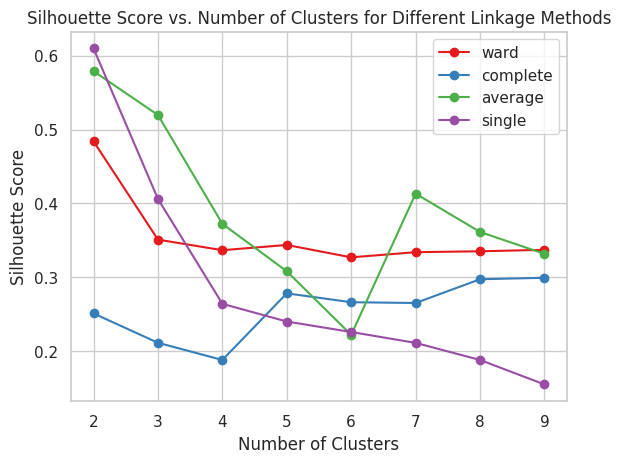

In [ ]:
# Visualisasi Silhouette Score
colors = sns.color_palette("Set1", len(linkage_col))
for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Pilih metode terbaik berdasarkan Silhouette Score
best_linkage = "single"  # Ubah sesuai hasil terbaik
n_cluster = 2  # Sesuaikan dengan hasil terbaik

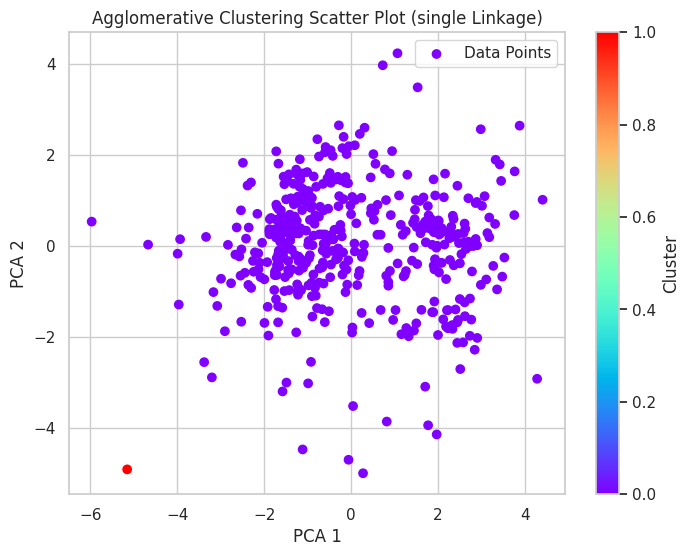

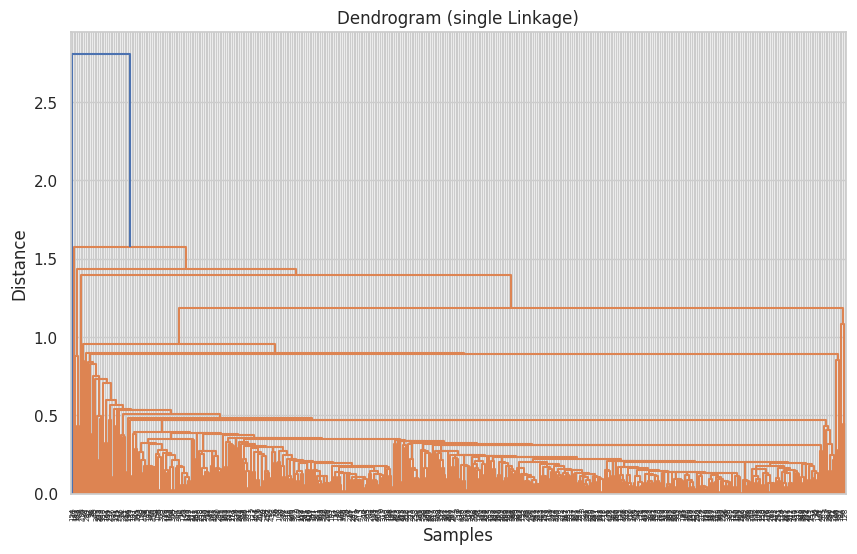

In [ ]:
# Jalankan Agglomerative Clustering dengan metode terbaik
AC = AgglomerativeClustering(n_clusters=n_cluster, linkage=best_linkage)
labels = AC.fit_predict(pca_data)

pca_data_with_labels = np.column_stack((pca_data, labels))

# Scatter plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='rainbow', label='Data Points')
plt.title(f'Agglomerative Clustering Scatter Plot ({best_linkage} Linkage)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

# Visualisasi Dendrogram
plt.figure(figsize=(10, 6))
linked = linkage(pca_data, method=best_linkage)
dendrogram(linked)
plt.title(f'Dendrogram ({best_linkage} Linkage)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

#### 5.3- DBSCAN

Best Epsilon: 1.75, Best Min Samples: 5
Best Silhouette Score: 0.6099


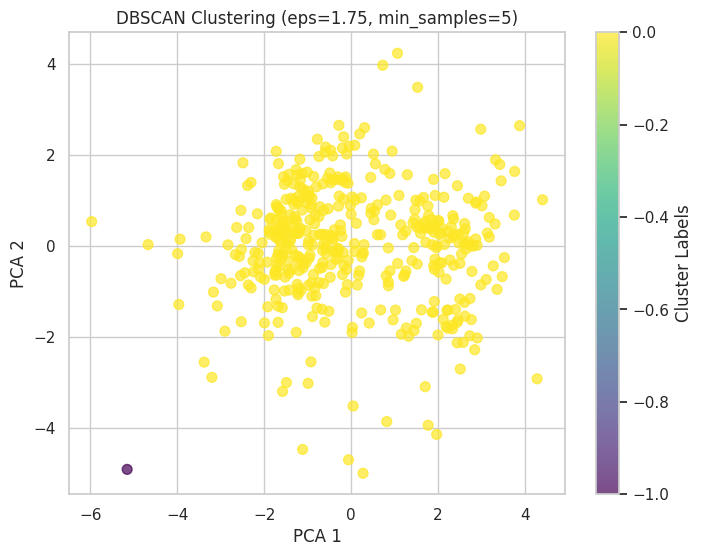

In [ ]:
# Range percobaan
epsilon_values = np.arange(0.5, 3.5, 0.25)
min_samples_values = range(5, 26, 5)

best_score = -1
best_params = None

# Looping untuk mencari kombinasi terbaik
for eps in epsilon_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(pca_data)
        labels = db.labels_

        # Pastikan ada minimal 2 cluster (bukan hanya noise)
        if len(set(labels)) > 1:
            score = silhouette_score(pca_data, labels)

            # Simpan kombinasi terbaik
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

# Output hasil terbaik
print(f"Best Epsilon: {best_params[0]}, Best Min Samples: {best_params[1]}")
print(f"Best Silhouette Score: {best_score:.4f}")

# Visualisasi hasil terbaik
db_best = DBSCAN(eps=best_params[0], min_samples=best_params[1]).fit(pca_data)
best_labels = db_best.labels_

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_labels, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'DBSCAN Clustering (eps={best_params[0]}, min_samples={best_params[1]})')
plt.colorbar(label='Cluster Labels')
plt.show()


#### 5.4- GMM

In [ ]:
# Simpan hasil evaluasi dalam list
bic_scores = []
silhouette_scores = []
gmm_results = []
n_components_range = range(2, 10)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=123)
    gmm_labels = gmm.fit_predict(pca_data)

    bic = gmm.bic(pca_data)
    silhouette = silhouette_score(pca_data, gmm_labels)

    bic_scores.append(bic)
    silhouette_scores.append(silhouette)
    gmm_results.append({"n_components": n, "BIC_Score": bic, "Silhouette_Score": silhouette})

# Konversi ke DataFrame dan urutkan berdasarkan Silhouette Score
gmm_df = pd.DataFrame(gmm_results).sort_values(by="Silhouette_Score", ascending=False)

# Menentukan jumlah cluster terbaik berdasarkan Silhouette Score
best_n = gmm_df.iloc[0]["n_components"]

# Convert best_n to integer explicitly
best_n = int(best_n)

# Cetak jumlah cluster terbaik
print("Best Number of Clusters:", best_n)
print(gmm_df)

gmm_final = GaussianMixture(n_components=best_n, random_state=123).fit(pca_data)
gmm_labels = gmm_final.predict(pca_data)

Best Number of Clusters: 2
   n_components    BIC_Score  Silhouette_Score
0             2  3186.382705          0.483270
1             3  3200.269163          0.443915
7             9  3319.255002          0.332201
2             4  3177.049611          0.308677
6             8  3284.112866          0.305708
5             7  3257.268552          0.298886
4             6  3232.491988          0.291511
3             5  3207.969604          0.196364


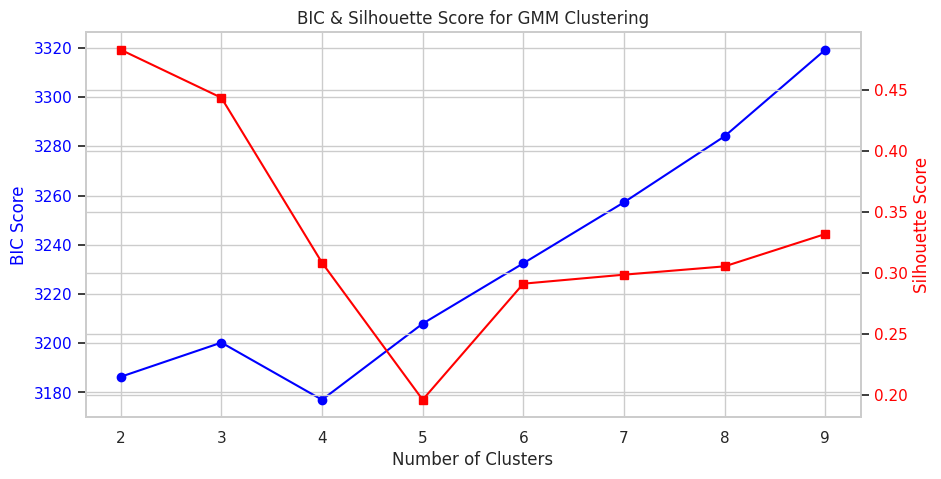

In [ ]:

# Visualisasi BIC dan Silhouette Score
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(n_components_range, bic_scores, marker='o', linestyle='-', color='blue', label="BIC Score")
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("BIC Score", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(n_components_range, silhouette_scores, marker='s', linestyle='-', color='red', label="Silhouette Score")
ax2.set_ylabel("Silhouette Score", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("BIC & Silhouette Score for GMM Clustering")
plt.show()

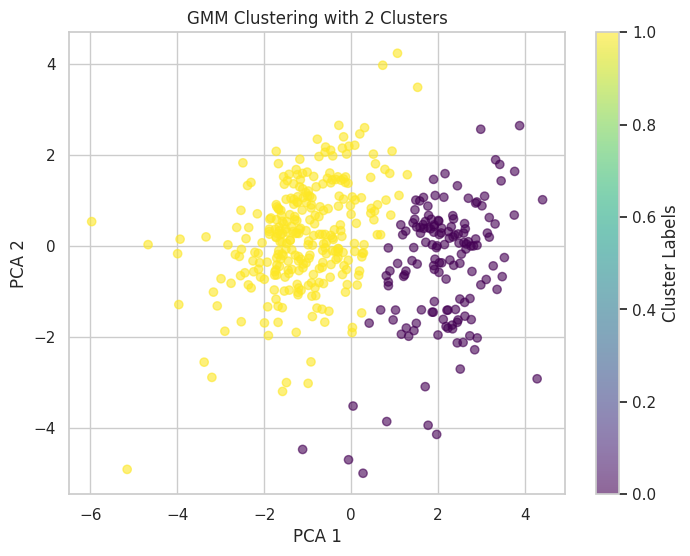

In [ ]:

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=gmm_labels, cmap='viridis', alpha=0.6)
plt.colorbar(label="Cluster Labels")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"GMM Clustering with {best_n} Clusters")
plt.show()


### 6-Comparing Results for the Optimal Number of Cluster Model

In [ ]:
k_means_cluster = KMeans(n_clusters=best_n_silhouette).fit_predict(df_std)
hierarchy_cluster = AgglomerativeClustering(n_clusters=n_cluster, linkage=best_linkage).fit_predict(df_std)
dbscan_cluster = DBSCAN(eps=best_params[0], min_samples=best_params[1]).fit_predict(df_std) #Change here
gmm_cluster = GaussianMixture(n_components=best_n).fit_predict(df_std)

# Silhouette Scores
k_means_s= silhouette_score(df_std, k_means_cluster, metric="euclidean")
hierarchy_s= silhouette_score(df_std, hierarchy_cluster, metric="euclidean")
dbscan_s= silhouette_score(df_std, dbscan_cluster, metric="euclidean") #Change here
gmm_s= silhouette_score(df_std, gmm_cluster, metric="euclidean")

# Perbandingan hasil
compare= [["KMeans", k_means_s], ["Hierarchical", hierarchy_s], ["DBSCAN", dbscan_s], ["GMM", gmm_s]] #Change here
compare= pd.DataFrame(compare, columns=["Clustering Method", "Silhouette Score"])
compare= compare.sort_values(by="Silhouette Score", ascending=False)
display(compare)

,Clustering Method,Silhouette Score
1,Hierarchical,0.479915
0,KMeans,0.287134
3,GMM,0.284682
2,DBSCAN,0.224727
